In [ ]:
# Comienzo importando librerias necesarias:
# Tratamiento de datos:
import numpy as np 
import pandas as pd 

# Preprocesado y modelado:
from sklearn.preprocessing import LabelEncoder
from matplotlib import style
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

# Gráficos:
import matplotlib.pyplot as plt
style.use('ggplot') or plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

# Configuración de warnings:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Subimos el archivo .csv:
from google.colab import files
upfiles = files.upload()

Saving DATOS_MINERIA.csv to DATOS_MINERIA.csv


In [ ]:
# Generamos un dataframe a partir del archivo .csv:
df = pd.read_csv('/content/DATOS_MINERIA.csv', sep=',')

# Elimino la columna Datos:
df2 = df.drop(['Datos'], axis=1)

# Codificamos las caraterístics categóricas en valores numericos:
encoder = LabelEncoder()
df2["Articulo"] = encoder.fit_transform(df2["Articulo"])
df2["Uso"] = encoder.fit_transform(df2["Uso"])
df2["Tamanio"] = encoder.fit_transform(df2["Tamanio"])
df2["Color"] = encoder.fit_transform(df2["Color"])
df2["Cantidad"] = encoder.fit_transform(df2["Cantidad"])

# Veo como quedo el dataframe:
df2.head()

,Articulo,Uso,Tamanio,Color,Cantidad
0,1,1,2,4,4
1,1,1,2,2,5
2,1,1,1,2,2
3,1,1,1,4,4
4,1,1,0,2,1


In [ ]:
# Observo algunos datos estadísticos:
df2.describe()

,Articulo,Uso,Tamanio,Color,Cantidad
count,36.000000,36.000000,36.000000,36.000000,36.000000
mean,0.500000,2.777778,1.083333,2.138889,3.166667
std,0.507093,2.256560,0.806226,1.417297,1.612452
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,2.000000
50%,0.500000,2.500000,1.000000,2.000000,4.000000
75%,1.000000,5.000000,2.000000,3.250000,4.000000
max,1.000000,6.000000,2.000000,4.000000,5.000000


Se puede interpretar lo siguiente para cada columna:

•	Articulo: La columna contiene 36 valores. No se puede inferir mucho sobre los datos, ya que parece ser una columna categórica binaria que solo puede tomar valores 0 y 1.

•	Uso: La columna contiene 36 valores. La media es 2.78, lo que sugiere que el uso promedio de los artículos es de alrededor de 3 veces. La desviación estándar es de 2.26, lo que indica una gran variabilidad en los datos. El valor mínimo es 0, lo que sugiere que algunos artículos no se usaron en absoluto. El valor máximo es 6, lo que indica que algunos artículos se usaron mucho más que otros.

•	Tamanio: La columna contiene 36 valores. La media es 1.08, lo que sugiere que el tamaño promedio de los artículos es de alrededor de 1. La desviación estándar es de 0.81, lo que indica una variabilidad moderada en los datos. El valor mínimo es 0, lo que sugiere que algunos artículos pueden ser muy pequeños. El valor máximo es 2, lo que sugiere que algunos artículos pueden ser relativamente grandes.

•	Color: La columna contiene 36 valores. La media es 2.14, lo que sugiere que el color promedio de los artículos es de alrededor de 2. La desviación estándar es de 1.42, lo que indica una gran variabilidad en los datos. El valor mínimo es 0, lo que sugiere que algunos artículos pueden no tener un color definido. El valor máximo es 4, lo que sugiere que algunos artículos pueden tener un color muy distintivo.

•	Cantidad: La columna contiene 36 valores. La media es 3.17, lo que sugiere que la cantidad promedio de los artículos es de alrededor de 3. La desviación estándar es de 1.61, lo que indica una variabilidad moderada en los datos. El valor mínimo es 0, lo que sugiere que algunos artículos pueden no estar disponibles en grandes cantidades. El valor máximo es 5, lo que sugiere que algunos artículos están disponibles en grandes cantidades.


In [ ]:
# Calculamos la frecuencia:
df.groupby(['Articulo', 'Uso', 'Tamanio', 'Color', 'Cantidad']).size()

Articulo  Uso            Tamanio  Color          Cantidad
Tarugo    cemento        chico    blanco         15          1
                                  gris           15          1
                         grande   blanco         12          1
                                  gris           14          1
                                  grisRojonegro  10          1
                         mediano  blanco         12          1
                                  gris           14          1
                                  grisRojonegro  10          1
          durlock        chico    blanco         15          1
                                  gris           15          1
                         mediano  gris           14          1
                                  grisRojonegro  10          1
          ladrillo       grande   blanco         12          1
                                  gris           14          1
                                  grisRojonegro  10         

La frecuencia indica cuántas veces se repite cada combinación de valores únicos de las variables categóricas Articulo, Uso, Tamanio, Color y Cantidad. En este caso, se han agrupado los valores de estas variables en función de su frecuencia y se ha calculado cuántas veces aparece cada combinación única en el conjunto de datos. Por ejemplo, la combinación de valores Articulo="Tarugo", Uso="cemento", Tamanio="chico", Color="blanco" y Cantidad=15 aparece una sola vez en el conjunto de datos.

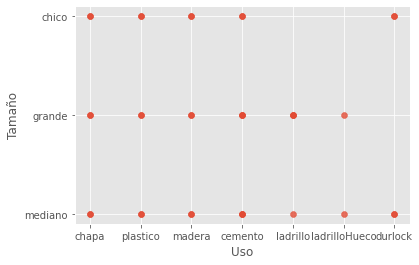

In [ ]:
# Grafico para observar mediante un diagrama de dispersión (scatterplot) para intuir si existe relación lineal:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=df.Uso, y=df.Tamanio, alpha= 0.8)
ax.set_xlabel('Uso')
ax.set_ylabel('Tamaño');

A simple vista, parece que hay una tendencia a que los materiales más grandes se utilizan para usos más intensivos. También podemos observar que el tamaño de los materiales de madera y chapa es principalmente pequeño o mediano, mientras que el tamaño de los ladrillos, cemento y durlock tiende a ser mediano o grande.

Sin embargo, hay que tener en cuenta que este gráfico solo muestra una relación aparente y no indica necesariamente una correlación lineal entre las variables. Para confirmar si hay una relación lineal, sería necesario calcular la correlación entre las variables y verificar si es significativa.


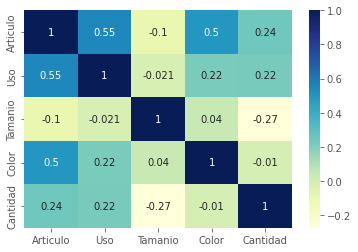

In [ ]:
# Veremos la Matriz de Correlación:
# Creo la matriz:
matrizCorr = df2.corr()

# Genero el mapa de calor:
sns.heatmap(matrizCorr, annot=True, cmap="YlGnBu")

# Graficamos:
plt.show()

La matriz que se muestra es una matriz de correlación, que indica cómo están relacionadas linealmente las variables del DataFrame. Los valores de la matriz de correlación varían entre -1 y 1, donde los valores más cercanos a 1 indican una correlación positiva fuerte entre las variables, y los valores más cercanos a -1 indican una correlación negativa fuerte entre las variables. Un valor de 0 indica que no hay correlación lineal entre las variables.

Al analizar la matriz de correlación dada, se puede ver que la variable "Articulo" está positivamente correlacionada con "Uso" y "Color", lo que sugiere que es probable que haya una relación entre el tipo de artículo y su uso o color. Además, "Uso" y "Cantidad" también están positivamente correlacionados, lo que sugiere que los artículos que se usan con mayor frecuencia también se compran en mayores cantidades.

Sin embargo, la variable "Tamanio" está débilmente correlacionada con todas las otras variables, lo que sugiere que no hay una relación fuerte entre el tamaño del artículo y las otras variables en el DataFrame.


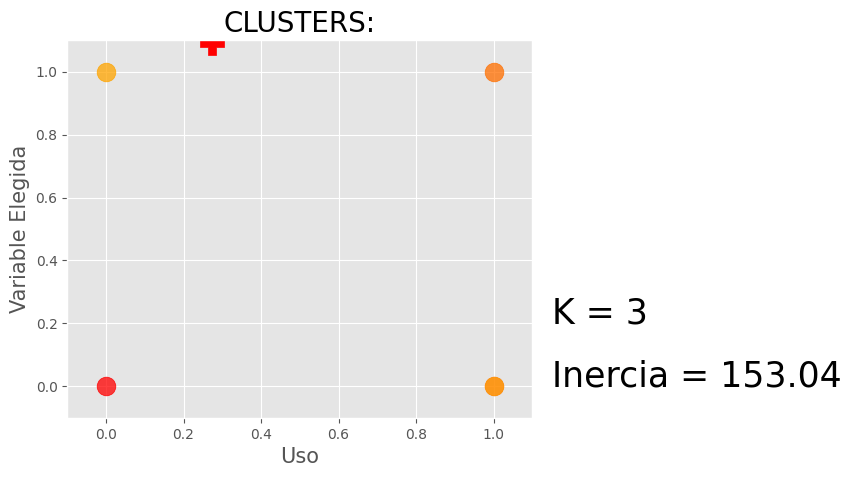

In [ ]:
# Ahora aplicamos K-Means, buscando agrupaciones que indiquen alguna tendencia.
# Generamos el modelo y especificando clusters e iteraciones:
n = 3  # Cantidad de clusters.
i = 100 # Cantidad de iteraciones.
kmeans = KMeans(n_clusters=n, n_init=i).fit(df2)

# Agregamos al dataframe "df2" una nueva columna con las etiquetas
# que KMeans asignó a cada cluster:
df2["cluster"] = kmeans.labels_

# Graficamos como queda nuestra agrupación y vemos el nro de clusters y
# el valor de la "Inercia", este último valor nos da una idea de que tan
# cercanos son los valores al centroide:
n_clusters = n
plt.figure(figsize=(6, 5), dpi=100)

colores = ["red", "blue", "orange", "black", "purple", "pink", "brown", "yellow"]



for cluster in range(kmeans.n_clusters):
    plt.scatter(df2[df2["cluster"] == cluster]["Tamanio"],
                df2[df2["cluster"] == cluster]["Uso"],
                marker="o", s=180, color=colores[cluster], alpha=0.5)
    
    plt.scatter(kmeans.cluster_centers_[cluster][0], 
                kmeans.cluster_centers_[cluster][1], 
                marker="P", s=280, color=colores[cluster])

plt.title("CLUSTERS:", fontsize=20)
plt.xlabel("Uso", fontsize=15)
plt.ylabel("Variable Elegida", fontsize=15)
plt.text(1.15, 0.2, "K = %i" % kmeans.n_clusters, fontsize=25)
plt.text(1.15, 0, "Inercia = %0.2f" % kmeans.inertia_, fontsize=25)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)    
plt.show()

# Eliminamos la columna "cluster" del dataframe:
del df2["cluster"]

La visualización resultante muestra cómo se agrupan las observaciones del conjunto de datos según dos variables, "Tamanio" y "Uso", y se les asigna un color diferente a cada cluster. Los puntos marcados con una "P" indican los centroides de cada cluster.

La inercia, medida que se muestra en el gráfico, es una medida de qué tan cercanas están las observaciones en un cluster con su centroide. Cuanto menor sea la inercia, más compacto será el cluster y mejor será el agrupamiento.

Creo que no se consigue una agrupación útil con este set de datos.